# Chapter: Input-Output Modeling - Part 1: 


## Topic: Fitting ARX model and generate step response curves

In [1]:
# import packages 
import matplotlib.pyplot as plt, numpy as np
from sklearn.preprocessing import StandardScaler
from sippy import system_identification as SysID
import control

# package settings
plt.rcParams.update({'font.size': 14})
assert(control.__version__ < '0.9'), "To avoid errors, downgrade the control package to a version < 0.9.0. See https://github.com/CPCLAB-UNIPI/SIPPY/issues/48 for details."

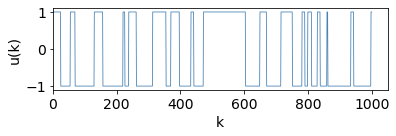

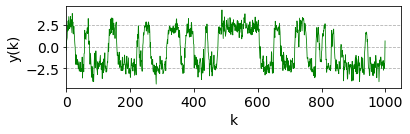

In [8]:
# read data and plot
data = np.loadtxt('ARX_illustrate_SNR10.csv', delimiter=',')
u = data[:,0, None]; y = data[:,1, None]

# plots
plt.figure(figsize=(6,1.5))
plt.plot(u, 'steelblue', linewidth=0.8)
plt.ylabel('u(k)'), plt.xlabel('k'), plt.xlim(0)

plt.figure(figsize=(6,1.5))
plt.plot(y, 'g', linewidth=0.8)
plt.ylabel('y(k)'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

In [9]:
# center data before model fitting
u_scaler = StandardScaler(with_std=False); u_centered = u_scaler.fit_transform(u) 
y_scaler = StandardScaler(with_std=False); y_centered = y_scaler.fit_transform(y) 

In [10]:
# fit ARX model
ARXmodel = SysID(y_centered, u_centered, 'ARX', ARX_orders=[1,1,0])
print(ARXmodel.G)


  0.9224
----------
z - 0.5636

dt = 1.0



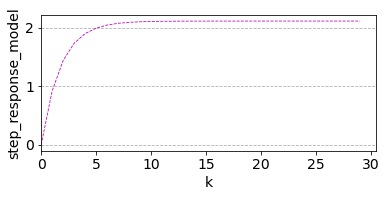

In [11]:
# generate  step response of ARX model
step_response_model, _ = control.matlab.step(ARXmodel.G, T=30)

plt.figure(figsize=(6,2.5))
plt.plot(step_response_model, 'm--', linewidth=0.8)
plt.ylabel('step_response_model'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

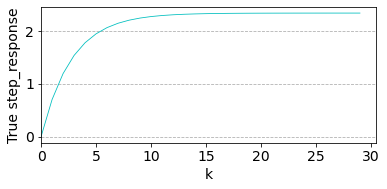

In [12]:
# generate step response of original process
# define the original process
NUM_G, DEN_G  = [0.7], [1, -0.7] 
sys_G = control.matlab.tf(NUM_G, DEN_G, 1)

# get step response
step_response_process, _ = control.matlab.step(sys_G, T=30)

plt.figure(figsize=(6,2.5))
plt.plot(step_response_process, 'c', linewidth=0.8)
plt.ylabel('True step_response'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

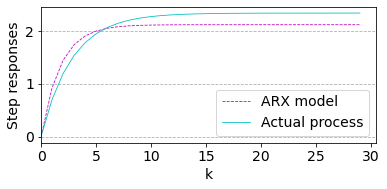

In [13]:
# overlay the step responses
plt.figure(figsize=(6,2.5))
plt.plot(step_response_model, 'm--', linewidth=0.8, label="ARX model")
plt.plot(step_response_process, 'c', linewidth=0.8, label="Actual process")
plt.ylabel('Step responses'), plt.xlabel('k'), plt.xlim(0), plt.legend()
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

In [16]:
# fit OE model
OEmodel = SysID(y_centered, u_centered, 'OE', OE_orders=[1,1,0])
print(OEmodel.G)


  0.6704
----------
z - 0.7052

dt = 1.0



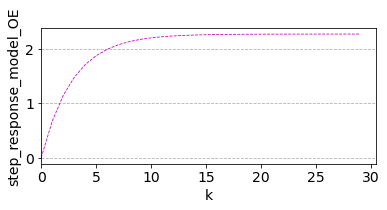

In [17]:
# generate  step response of OE model
step_response_model_OE, _ = control.matlab.step(OEmodel.G, T=30)

plt.figure(figsize=(6,2.5))
plt.plot(step_response_model_OE, 'm--', linewidth=0.8)
plt.ylabel('step_response_model_OE'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

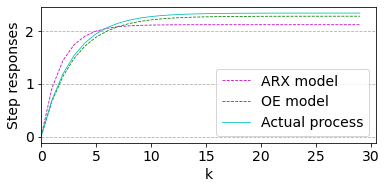

In [18]:
# overlay all the three step responses
plt.figure(figsize=(6,2.5))
plt.plot(step_response_model, 'm--', linewidth=0.8, label="ARX model")
plt.plot(step_response_model_OE, 'g--', linewidth=0.8, label="OE model")
plt.plot(step_response_process, 'c', linewidth=0.8, label="Actual process")
plt.ylabel('Step responses'), plt.xlabel('k'), plt.xlim(0)
plt.legend()
plt.grid(which='both', axis='y', linestyle='--')
plt.show()